In [90]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=10)
OUTPUTROOT = 'report_HPD_pre_post'
INPUTROOT = 'data_HPD_pre_post'

In [91]:
source('/GCI/jup/A_TSF/dev/lib/yutils.R')
options(repr.plot.width=12
       # , repr.plot.height=8
       )
library(ggsci)
library(ggpubr)

# install.packages("hrbrthemes")
# install.packages("wesanderson")
# library(wesanderson)
# library(viridis)
# library(hrbrthemes)

In [133]:
WIDTH = 5.5
HEIGHT = 6

## figS1A


In [249]:
figs1a = yload_dfx('figS1A_snv',frm=INPUTROOT)
figs1a = figs1a[,1:7]
figs1a_long = figs1a %>% dplyr::select(!ends_with('Total')) %>% pivot_longer(!c('id','a'),names_to = "stage",values_to = 'count')
figs1a_long$stage = factor(figs1a_long$stage,levels=c('preSoleN','postSoleN','interN'))
figs1a

[1] "[ 2023-01-31 07:21:58 ]  read [ figS1A_snv.dfx ] as ' figS1A_snv ' from >  data_HPD_pre_post"


id,a,preTotal,postTotal,preSoleN,postSoleN,interN
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
HPD1,A04569,166,140,90,64,76
HPD2,A05812,123,133,52,62,71
HPD3,A06935,144,153,80,89,64
HPD4,A11906,111,110,48,47,63
HPD5,A11907,100,102,35,37,65
HPD6,A11908,112,84,45,17,67


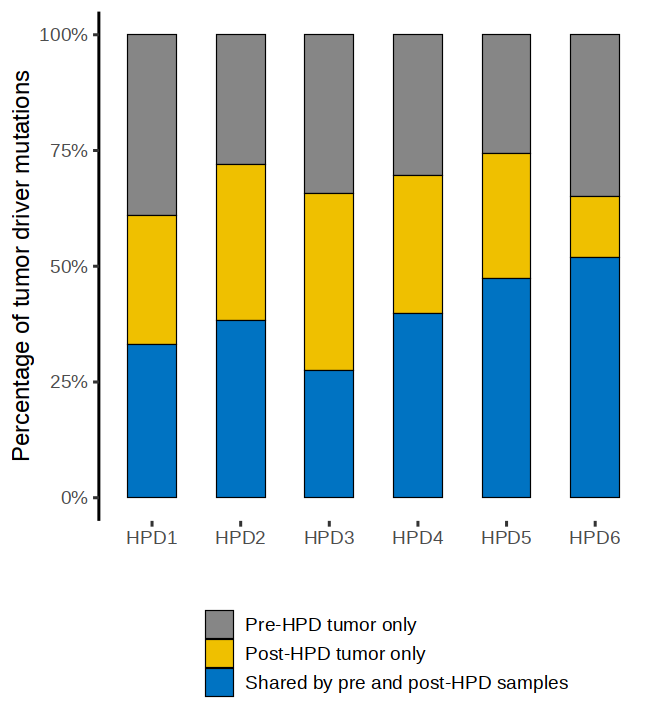

In [251]:

make.custom(5.5,6)

gg = figs1a_long %>% ggplot(aes(x=id,y=count,fill=stage))+
    geom_bar(position="fill", stat="identity",width=.55
            ,color='black',size=0.25
            ) +
#     scale_fill_viridis(discrete = T, option = "E")+
#     theme_ipsum(base_family = 'sans',base_size = 20,axis_title_size = 24)+
    theme_classic(base_size = 14)+
#     scale_x_discrete(expand = c(0, 0)) + 
#     scale_y_continuous(expand = c(0, 0)) +
#     scale_fill_jama()+
#     scale_fill_rickandmorty() +
#     scale_fill_simpsons() +
    theme(axis.line.x = element_blank()) +
    theme(legend.position="bottom"
          ,legend.title = element_blank()) +
    guides(fill=guide_legend(ncol=1)) +
#     scale_fill_jco() +
    
#     theme(color='black') +
#     expand_limits(x = 0.5, y = 0) +
    scale_fill_manual(values=pal_jco()(3)[3:1]
                      ,labels = c('Pre-HPD tumor only'
                                 ,'Post-HPD tumor only'
                                 ,'Shared by pre and post-HPD samples'))+
    scale_y_continuous(labels = function(x) paste0(x*100, "%"))+
    xlab("")+
    ylab('Percentage of tumor driver mutations')
gg

In [157]:
gg %>% ydumpto('figS1A all gene mutation distribution of patients.pdf' 
        ,width=WIDTH,height=HEIGHT
        ,outputdir = 'report_HPD_pre_post')


[1] "[ 2022-08-30 02:20:58 ]  write 1 pdf at report_HPD_pre_post/figS1A all gene mutation distribution of patients.pdf"


## fig S1B

In [158]:
snv

Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,HGVSp_Short,VAF,symbol,a,n,t,p,ap,Custom_Label,Clin_classification,g
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MZT2B,GRCh37,chr2,130948045,130948045,Missense_Mutation,SNP,G,A,HPD6_pre,p.R168K,31.28,MZT2B,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
ATAD3A,GRCh37,chr1,1452551,1452551,Missense_Mutation,SNP,G,A,HPD5_post,p.R96Q,18.31,ATAD3A,A11907,N9071213DA,T9073291DA,P01KYA1190702,A11907P01KYA1190702,HPD5_post,HPD_post,HPD_post
FSIP2,GRCh37,chr2,186667721,186667721,Missense_Mutation,SNP,A,T,HPD3_post,p.Q4652L,15.38,FSIP2,A06935,N9352203D,T9356812D,P010693501,A06935P010693501,HPD3_post,HPD_post,HPD_post
MUC16,GRCh37,chr19,9068208,9068208,Missense_Mutation,SNP,C,A,HPD3_pre,p.G6413V,8.64,MUC16,A06935,N9352203D,T9358371D,P010693502,A06935P010693502,HPD3_pre,HPD_pre,HPD_pre
LGI2,GRCh37,chr4,25032261,25032261,In_Frame_Del,DEL,CCAG,C,HPD5_post,p.L18del,8.00,LGI2,A11907,N9071213DA,T9073291DA,P01KYA1190702,A11907P01KYA1190702,HPD5_post,HPD_post,HPD_post
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
LAMA1,GRCh37,chr18,7023307,7023307,Missense_Mutation,SNP,C,T,HPD6_pre,p.G853S,12.16,LAMA1,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
DGAT2,GRCh37,chr11,75509295,75509295,Missense_Mutation,SNP,C,T,HPD3_pre,p.S278F,29.69,DGAT2,A06935,N9352203D,T9358371D,P010693502,A06935P010693502,HPD3_pre,HPD_pre,HPD_pre
MTERFD1,GRCh37,chr8,97256275,97256275,Missense_Mutation,SNP,C,T,HPD5_pre,p.E311K,42.86,MTERFD1,A11907,N9071213DA,T9071691DA,P01KYA1190701,A11907P01KYA1190701,HPD5_pre,HPD_pre,HPD_pre


In [159]:
snv = yload_dfx('data_HPD_pre_post/snv.dfx')
glx = yload_dfx('data_HPD_pre_post/glx.dfx')

[1] "[ 2022-08-30 02:30:46 ]  read [ snv.dfx ] as ' snv ' from >  data_HPD_pre_post"
[1] "[ 2022-08-30 02:30:46 ]  read [ glx.dfx ] as ' glx ' from >  data_HPD_pre_post"


In [169]:
snv[snv$Hugo_Symbol=='TP53',]

,Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,HGVSp_Short,VAF,symbol,a,n,t,p,ap,Custom_Label,Clin_classification,g
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,TP53,GRCh37,chr17,7578454,7578455,Missense_Mutation,SNP,GC,AA,HPD6_pre,p.A159F,33.01000,TP53,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
14,TP53,GRCh37,chr17,7578205,7578205,Frame_Shift_Del,DEL,CTA,C,HPD4_post,p.H214fs,52.25000,TP53,A11906,N9063653DA,T9063761DA,P01KYA1190601,A11906P01KYA1190601,HPD4_post,HPD_post,HPD_post
17,TP53,GRCh37,chr17,7577557,7577557,Frame_Shift_Del,DEL,AG,A,HPD1_pre,p.C242fs,77.51000,TP53,A04569,N5693213,T5694221D,P0104569KY,A04569P0104569KY,HPD1_pre,HPD_pre,HPD_pre
20,TP53,GRCh37,chr17,7577572,7577592,Frame_Shift_Ins,INS,T,TGTAGTTGTAGTGGATGGTGG,HPD5_post,p.M237fs,31.38000,TP53,A11907,N9071213DA,T9073291DA,P01KYA1190702,A11907P01KYA1190702,HPD5_post,HPD_post,HPD_post
64,TP53,GRCh37,chr17,7578454,7578455,Missense_Mutation,SNP,GC,AA,HPD6_post,p.A159F,54.28492,TP53,A11908,N9089563DA,T9081291DA,P01KYA1190802,A11908P01KYA1190802,HPD6_post,HPD_post,HPD_post
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
88,TP53,GRCh37,chr17,7578446,7578446,Missense_Mutation,SNP,T,A,HPD2_post,p.I162F,85.55,TP53,A05812,N8122603D,T8126541D,P010581201,A05812P010581201,HPD2_post,HPD_post,HPD_post
95,TP53,GRCh37,chr17,7577572,7577592,Frame_Shift_Ins,INS,T,TGTAGTTGTAGTGGATGGTGG,HPD5_pre,p.M237fs,63.44,TP53,A11907,N9071213DA,T9071691DA,P01KYA1190701,A11907P01KYA1190701,HPD5_pre,HPD_pre,HPD_pre
96,TP53,GRCh37,chr17,7577557,7577557,Frame_Shift_Del,DEL,AG,A,HPD1_post,p.C242fs,61.94,TP53,A04569,N5693213,T5697572,P0104569B,A04569P0104569B,HPD1_post,HPD_post,HPD_post


In [174]:
library(maftools)
laml = read.maf(snv,glx)
# laml %>% getSampleSummary

-Validating
-Summarizing
-Processing clinical data
-Finished in 0.081s elapsed (1.316s cpu) 


Assuming protein change information are stored under column HGVSp_Short. Use argument AACol to override if necessary.

8 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



   HGNC    refseq.ID   protein.ID aa.length
1: TP53    NM_000546    NP_000537       393
2: TP53 NM_001126112 NP_001119584       393
3: TP53 NM_001126113 NP_001119585       346
4: TP53 NM_001126114 NP_001119586       341
5: TP53 NM_001126115 NP_001119587       261
6: TP53 NM_001126116 NP_001119588       209
7: TP53 NM_001126117 NP_001119589       214
8: TP53 NM_001126118 NP_001119590       354


Using longer transcript NM_000546 for now.



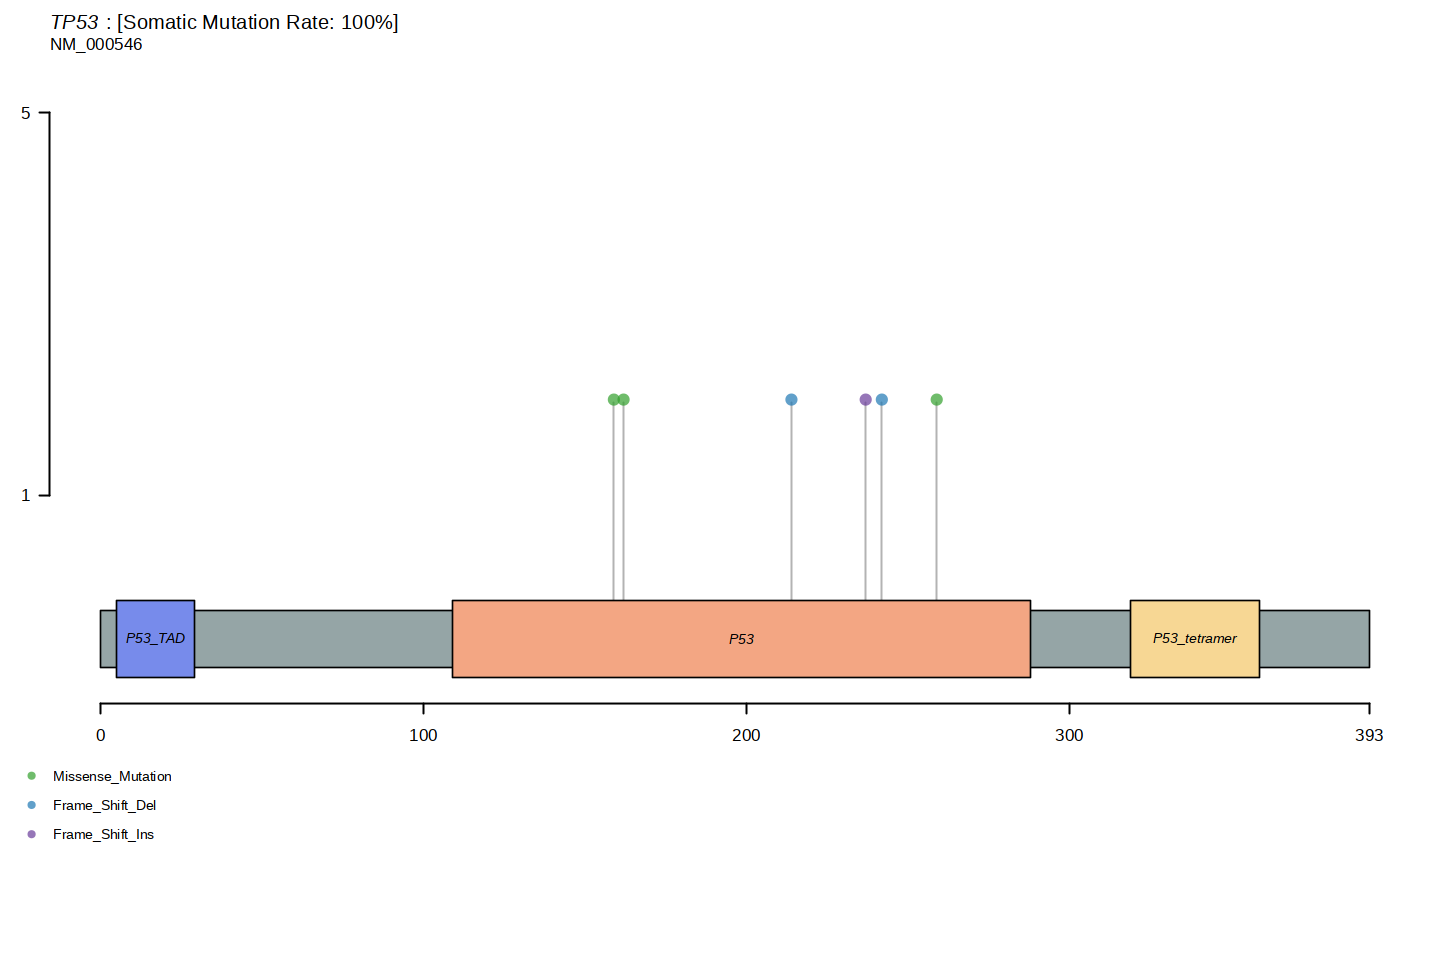

In [172]:
make.wide()

lollipopPlot(maf = laml,gene = 'TP53')

In [176]:
pdf('report_HPD_pre_post/figS1B_TP53_lollipopplot.pdf',width = 8,height = 6)
lollipopPlot(maf = laml,gene = 'TP53')
dev.off()

Assuming protein change information are stored under column HGVSp_Short. Use argument AACol to override if necessary.

8 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



   HGNC    refseq.ID   protein.ID aa.length
1: TP53    NM_000546    NP_000537       393
2: TP53 NM_001126112 NP_001119584       393
3: TP53 NM_001126113 NP_001119585       346
4: TP53 NM_001126114 NP_001119586       341
5: TP53 NM_001126115 NP_001119587       261
6: TP53 NM_001126116 NP_001119588       209
7: TP53 NM_001126117 NP_001119589       214
8: TP53 NM_001126118 NP_001119590       354


Using longer transcript NM_000546 for now.



png 
  2

## fig 2A

In [83]:
fig2a = yload_dfx('fig2a',frm='data_HPD_pre_post/')
colnames(fig2a) = c('a','id','Group','MutationCount','pid')

fig2a

[1] "[ 2022-08-29 09:40:53 ]  read [ fig2a.dfx ] as ' fig2a ' from >  data_HPD_pre_post/"


a,id,Group,MutationCount,pid
<chr>,<chr>,<chr>,<int>,<chr>
A04569,HPD1_post,HPD_post,140,HPD1
A04569,HPD1_pre,HPD_pre,166,HPD1
A05812,HPD2_post,HPD_post,133,HPD2
A05812,HPD2_pre,HPD_pre,124,HPD2
A06935,HPD3_post,HPD_post,154,HPD3
⋮,⋮,⋮,⋮,⋮
A11906,HPD4_pre,HPD_pre,111,HPD4
A11907,HPD5_post,HPD_post,102,HPD5
A11907,HPD5_pre,HPD_pre,100,HPD5


[1] "[ 2022-08-29 10:09:33 ]  write 1 pdf at report_HPD_pre_post/fig2A somatic mutation distribution across patients.pdf"


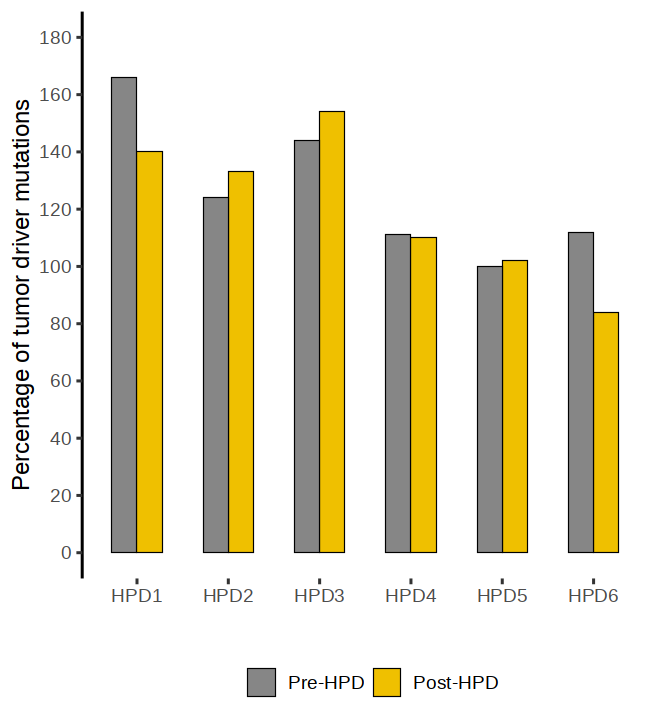

In [141]:
make.custom(WIDTH,HEIGHT)

# fig2b_long = fig2b %>% select(!ends_with('Total')) %>% pivot_longer(!c('id','a','name'),names_to = "stage",values_to = 'count')
fig2a$Group = factor(fig2a$Group,levels = c('HPD_pre','HPD_post'))
gg = fig2a %>% ggplot(aes(x=pid,y=MutationCount,fill=Group))+
    geom_bar(position="dodge", stat="identity",width=.55
            ,color='black',size=0.25
            ) +
#     scale_fill_viridis(discrete = T, option = "E")+
#     theme_ipsum(base_family = 'sans',base_size = 20,axis_title_size = 24)+
    theme_classic(base_size = 14)+
#     scale_x_discrete(expand = c(0, 0)) + 
#     scale_y_continuous(expand = c(0, 0)) +
#     scale_fill_jama()+
#     scale_fill_rickandmorty() +
#     scale_fill_simpsons() +
    theme(axis.line.x = element_blank()) +
    theme(legend.position="bottom"
          ,legend.title = element_blank()) +
    guides(fill=guide_legend(ncol=2)) +
#     scale_fill_jco() +
    scale_y_continuous(breaks = seq(0,180,20), limits = c(0,180)) +
#     theme(color='black') +
#     expand_limits(x = 0.5, y = 0) +
    scale_fill_manual(values=pal_jco()(3)[3:2]
                      ,labels = c('Pre-HPD','Post-HPD'))+
#     scale_y_continuous(labels = function(x) paste0(x*100, "%"))+
    xlab("")+
    ylab('Percentage of tumor driver mutations')
gg %>% ydumpto('fig2A somatic mutation distribution across patients.pdf' , width=WIDTH,height=HEIGHT,outputdir = 'report_HPD_pre_post')

                       
gg

## fig 2B

In [89]:
fig2b_long$stage %>% unique

[1] "preSoleN"  "postSoleN" "interN"

In [265]:
fig2b = yload_dfx('fig2b',frm=INPUTROOT)
fig2b = fig2b[,1:7]

fig2b_long = fig2b %>% dplyr::select(!ends_with('Total')) %>% pivot_longer(!c('id','a'),names_to = "stage",values_to = 'count')
fig2b_long$stage = factor(fig2b_long$stage,levels =c('preSoleN','postSoleN','interN'))

fig2b_long

[1] "[ 2023-01-31 07:24:48 ]  read [ fig2b.dfx ] as ' fig2b ' from >  data_HPD_pre_post"


id,a,stage,count
<chr>,<chr>,<fct>,<int>
HPD1,A04569,preSoleN,3
HPD1,A04569,postSoleN,3
HPD1,A04569,interN,4
HPD2,A05812,preSoleN,0
HPD2,A05812,postSoleN,2
⋮,⋮,⋮,⋮
HPD5,A11907,postSoleN,0
HPD5,A11907,interN,1
HPD6,A11908,preSoleN,1


[1] "[ 2023-01-31 07:25:03 ]  write 1 pdf at report_HPD_pre_post/fig2B driver gene mutation distribution of patients.pdf"


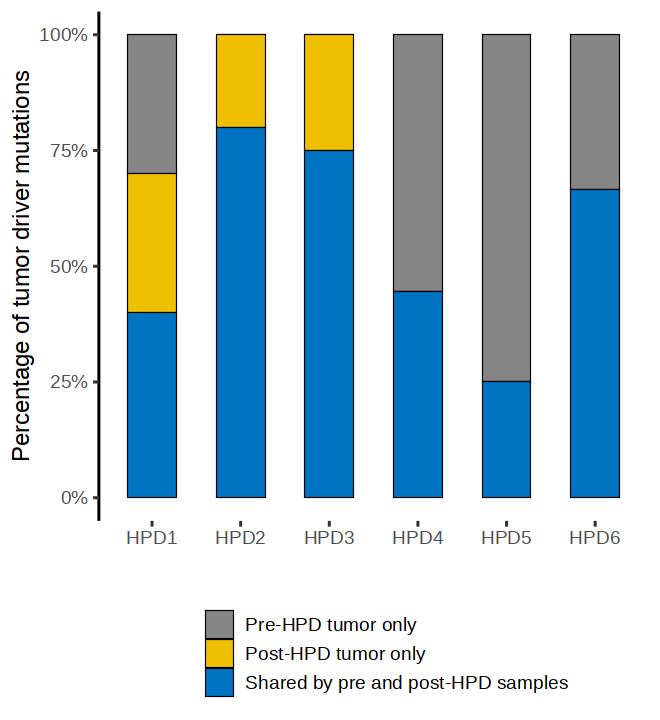

In [266]:
make.custom(WIDTH,HEIGHT)

gg = fig2b_long %>% ggplot(aes(x=id,y=count,fill=stage))+
    geom_bar(position="fill", stat="identity",width=.55
            ,color='black',size=0.25
            ) +
#     scale_fill_viridis(discrete = T, option = "E")+
#     theme_ipsum(base_family = 'sans',base_size = 20,axis_title_size = 24)+
    theme_classic(base_size = 14)+
#     scale_x_discrete(expand = c(0, 0)) + 
#     scale_y_continuous(expand = c(0, 0)) +
#     scale_fill_jama()+
#     scale_fill_rickandmorty() +
#     scale_fill_simpsons() +
    theme(axis.line.x = element_blank()) +
    theme(legend.position="bottom"
          ,legend.title = element_blank()) +
    guides(fill=guide_legend(ncol=1)) +
#     scale_fill_jco() +
    
#     theme(color='black') +
#     expand_limits(x = 0.5, y = 0) +
    scale_fill_manual(values=pal_jco()(3)[3:1]
                      ,labels = c('Pre-HPD tumor only'
                                 ,'Post-HPD tumor only'
                                 ,'Shared by pre and post-HPD samples'))+
    scale_y_continuous(labels = function(x) paste0(x*100, "%"))+
    xlab("")+
    ylab('Percentage of tumor driver mutations')

gg %>% ydumpto('fig2B driver gene mutation distribution of patients.pdf' 
        ,width=WIDTH,height=HEIGHT
        ,outputdir = 'report_HPD_pre_post')


gg

## fig 2C coOncoplot

In [28]:
# %%R
# select group columns
COLS = c('Clin_classification')

# load all wes data
L = list()
for (i in c('snv_all','snv','cnv_all','cnv','glx'
           # ,'armlvl_cnv','armlvl_cnv_all'
           )) {
    L[[i]] = yload_dfx(i,frm = INPUTROOT)
}

glx = L[['glx']]

# set colors
CNV_LEGEND = structure(c("Amplification","Gain","Loss","Deletion")
          ,names=c("Frame_Shift_Ins","In_Frame_Ins","In_Frame_Del","Frame_Shift_Del"))
yset_color_scheme()
ygen_anno_color(glx,cols=COLS)


COL_CNV
COL_SNV
COL_TITV
COL_ANNO

[1] "[ 2023-01-30 09:55:30 ]  read [ snv_all.dfx ] as ' snv_all ' from >  data_HPD_pre_post"
[1] "[ 2023-01-30 09:55:30 ]  read [ snv.dfx ] as ' snv ' from >  data_HPD_pre_post"
[1] "[ 2023-01-30 09:55:30 ]  read [ cnv_all.dfx ] as ' cnv_all ' from >  data_HPD_pre_post"
[1] "[ 2023-01-30 09:55:30 ]  read [ cnv.dfx ] as ' cnv ' from >  data_HPD_pre_post"
[1] "[ 2023-01-30 09:55:30 ]  read [ glx.dfx ] as ' glx ' from >  data_HPD_pre_post"
[1] "global var COL_SNV, COL_CNV, COL_TITV have been set."
[1] "global var COL_ANNO has been set."


Frame_Shift_Del           In_Frame_Del        Frame_Shift_Ins 
             "#3653A5"              "#BFC2D7"              "#E21A21" 
          In_Frame_Ins      Missense_Mutation            Splice_Site 
             "#E5B3B8"              "#464E2B"              "#559FCD" 
Translation_Start_Site      Nonsense_Mutation       Nonstop_Mutation 
             "#B2DF8A"              "#33A02C"              "#A8352A" 
               5'Flank              Multi_Hit 
             "#8dd3c7"              "#6B4B98"

Frame_Shift_Del      Missense_Mutation        Frame_Shift_Ins 
             "#A6CEE3"              "#1F78B4"              "#B2DF8A" 
           Splice_Site Translation_Start_Site      Nonsense_Mutation 
             "#33A02C"              "#FB9A99"              "#E31A1C" 
      Nonstop_Mutation           In_Frame_Del           In_Frame_Ins 
             "#FDBF6F"              "#FF7F00"              "#CAB2D6" 
               5'Flank              Multi_Hit 
             "#8dd3c7"              "#6A3D9A"

C>A       C>G       C>T       T>C       T>A       T>G 
"#FF6C91" "#CD9600" "#49B500" "#00C1A9" "#00A9FF" "#E36EF6"

$Clin_classification
   HPD_post     HPD_pre 
"#E64B35FF" "#4DBBD5FF"

In [32]:
library(maftools)

In [93]:
# %%R -w 750
# change these to draw
TOP_GENES = 15
data = list()
# ------------------------
# PLOT SNV
maf.snv.all = read.maf(L[['snv_all']],L[['glx']])
maf.snv = read.maf(L[['snv']],L[['glx']])
genes.snv = c('TP53','TTN','CNN2','FAT1','TMEM132D','SZT2','JPH2','BIRC6','LRP2','KIAA1462')
# maf.snv %>% getGeneSummary %>% head(10) %>% pull(Hugo_Symbol)

maf.cnv.all = read.maf(L[['cnv_all']],L[['glx']])
maf.cnv = read.maf(L[['cnv']],L[['glx']])
genes.cnv = c("MROH6","LGALS7","HIST2H4A","HIST2H4B","HIST2H2BC","MYC","SLC52A2","ZFP36","MEX3A","DBET","ACTN4","THEM6","LAGE3","CAPN12","RXFP4","SYPL1")
#maf.cnv %>% getGeneSummary %>% head(16) %>% pull(Hugo_Symbol)

genes.snv
genes.cnv


-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
-Processing clinical data
-Finished in 0.167s elapsed (3.296s cpu) 
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.059s elapsed (1.349s cpu) 
-Validating
--Removed 256 duplicated variants
-Summarizing
-Processing clinical data
-Finished in 0.781s elapsed (9.583s cpu) 
-Validating
--Removed 11 duplicated variants
-Summarizing
-Processing clinical data
-Finished in 0.090s elapsed (1.800s cpu) 


[1] "TP53"     "TTN"      "CNN2"     "FAT1"     "TMEM132D" "SZT2"    
 [7] "JPH2"     "BIRC6"    "LRP2"     "KIAA1462"

[1] "MROH6"     "LGALS7"    "HIST2H4A"  "HIST2H4B"  "HIST2H2BC" "MYC"      
 [7] "SLC52A2"   "ZFP36"     "MEX3A"     "DBET"      "ACTN4"     "THEM6"    
[13] "LAGE3"     "CAPN12"    "RXFP4"     "SYPL1"

In [29]:
.INPUT = list(fu=c(mol='rna_fusion',g='rna_glx')
              ,snv=c(mol='snv_all',g='glx',genes='genes.snv',color='COL_SNV')
              ,cnv=c(mol='cnv_all',g='glx',genes='genes.cnv',color='COL_CNV')
             )
or1 = glx[glx$Clin_classification == 'HPD_pre', 'Tumor_Sample_Barcode']
or2 = glx[glx$Clin_classification == 'HPD_post', 'Tumor_Sample_Barcode']
or1
or2

[1] "HPD1_pre" "HPD2_pre" "HPD3_pre" "HPD4_pre" "HPD5_pre" "HPD6_pre"

[1] "HPD1_post" "HPD2_post" "HPD3_post" "HPD4_post" "HPD5_post" "HPD6_post"

In [ ]:
read.maf()

[1] "[ 2023-01-30 10:31:34 ]  read [ snv_all.dfx ] as ' snv_all ' from >  data_HPD_pre_post"
[1] "[ 2023-01-30 10:31:34 ]  read [ glx.dfx ] as ' glx ' from >  data_HPD_pre_post"
-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
-Processing clinical data
-Finished in 0.130s elapsed (2.686s cpu) 
-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
-Processing clinical data
-Finished in 0.123s elapsed (2.843s cpu) 
[1] "Applying filter: Clin_classification == 'HPD_pre' or 'HPD_post' "
[1] "[!] 4 Global variables set: g1, g2, g1name, g2name"
[1] "[!] Estimate p value for showing is 0.5"


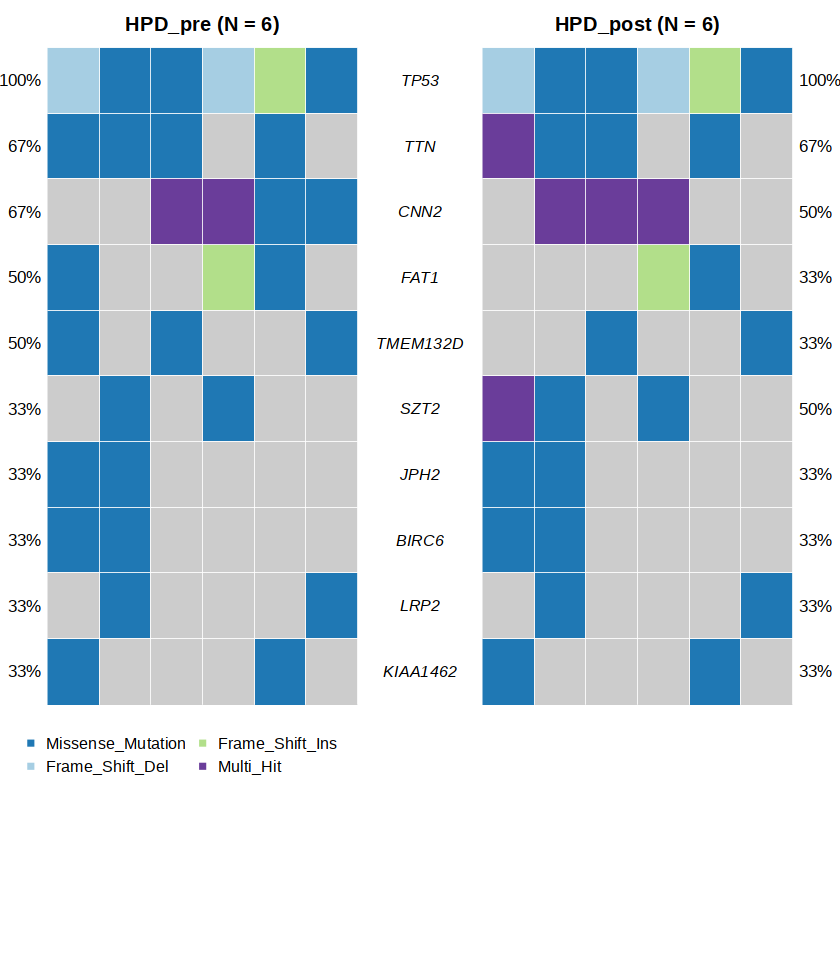

[1] "Global var .res, .data assigned!"


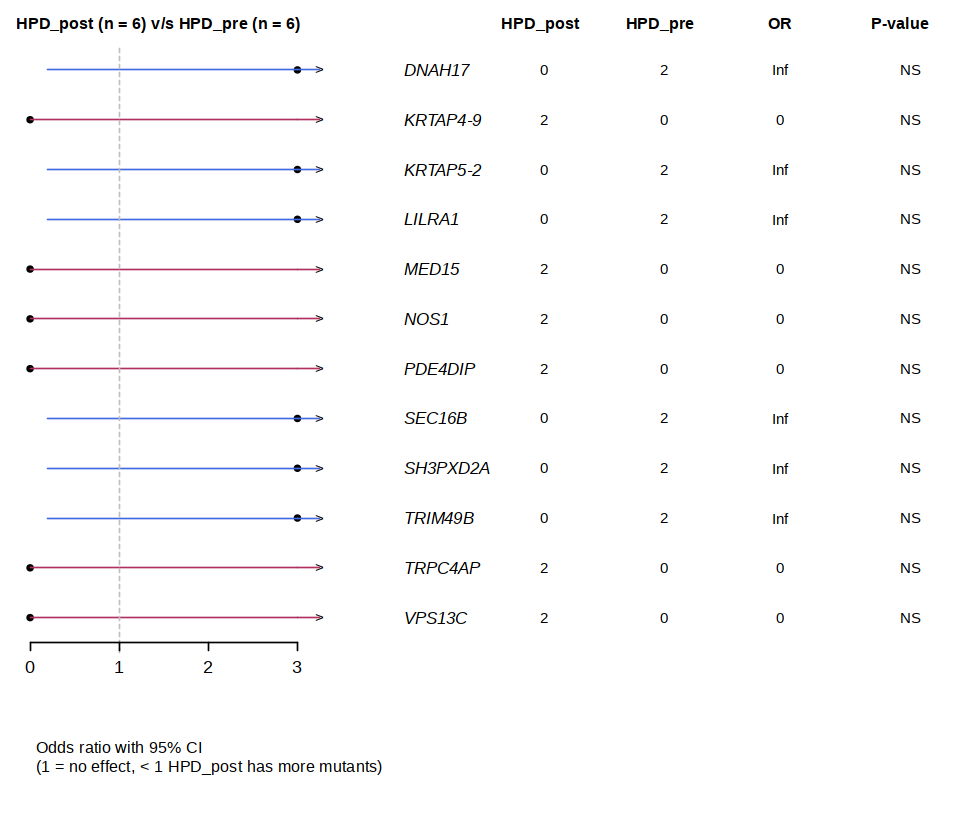

In [94]:
# %%R -w 650
TYPE = 'snv' # c('fu','snv','cnv','cyto')
.res = list()
.data = list()

.data$mol = yload_dfx(.INPUT[[TYPE]]['mol'], frm=INPUTROOT)
.data$glx = yload_dfx(.INPUT[[TYPE]]['g'], frm=INPUTROOT)
if (TYPE %in% c('snv','cnv')){
    .data$sel_genes = get(.INPUT[[TYPE]]['genes'],envir = .GlobalEnv)
    .data$sel_color = get(.INPUT[[TYPE]]['color'],envir = .GlobalEnv)
}
ygen_subMafs_(.data$mol,.data$glx,removeDuplicatedVariants = FALSE)
# plot coOncoplot
.data$plt.coon = expr(
    coOncoplot(m1 = g1, m2 = g2,sampleOrder1 = or1, sampleOrder2 = or2
               ,gene_mar=1.5
               , m1Name = g1name, m2Name = g2name
               # ,lengend_txt_replace =
               ,genes = .data$sel_genes
               ,removeNonMutated = FALSE
               ,colors = .data$sel_color
              )
)

make.custom(7,8)
# plt.coon %>% ysave('wes','coOncoplot','SNV',outputdir = OUTPUTROOT)
gg.2c1 =.data$plt.coon
eval(.data$plt.coon)


# plot forestplot
.data$g1.vs.g2 = mafCompare(m1 = g1, m2 = g2
                            , m1Name = g1name
                            , m2Name = g2name
                            , minMut = 0)

data$fig2c.snv.cmp = .data$g1.vs.g2$results

.x = .data$g1.vs.g2$results
for(p in c(0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5)){
    n = .x[.x$pval< p,] %>% nrow
    if ( n > 3) break
}
print(paste0('[!] Estimate p value for showing is ',p))
.data$plt.fors = expr(
    forestPlot(.data$g1.vs.g2, pVal = p)
)

make.custom(8,7)
# plt.fors %>% ysave('wes','forestplot','SNV',outputdir = OUTPUTROOT)
eval(.data$plt.fors)
# .g1.vs.g2$results %>% ysave('wes','forestplot','SNV', outputdir = OUTPUTROOT)

.res[[TYPE]] = .data
print('Global var .res, .data assigned!')

In [59]:
yload_dfx(.INPUT[[TYPE]]['mol'], frm=INPUTROOT) %>% dplyr::distinct(Hugo_Symbol,Tumor_Sample_Barcode,.keep_all = TRUE)

[1] "[ 2023-01-30 10:20:34 ]  read [ cnv_all.dfx ] as ' cnv_all ' from >  data_HPD_pre_post"


Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,HGVSp_Short,VAF,symbol,a,n,t,p,ap,Custom_Label,Clin_classification,g
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
HMMR-AS1,GRCh37,chr5,162909409,162921264,In_Frame_Del,DEL,C,TRUE,HPD6_pre,p.L858R,1.16,HMMR-AS1,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
COL11A1,GRCh37,chr1,103341822,103574252,In_Frame_Del,DEL,C,TRUE,HPD6_pre,p.L858R,1.16,COL11A1,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
RXFP4,GRCh37,chr1,155911279,155912825,In_Frame_Ins,INS,C,TRUE,HPD6_pre,p.L858R,3.33,RXFP4,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
SYCP1,GRCh37,chr1,115397223,115538190,In_Frame_Del,DEL,C,TRUE,HPD6_pre,p.L858R,1.19,SYCP1,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
HIST2H4A,GRCh37,chr1,149804020,149804816,In_Frame_Ins,INS,C,TRUE,HPD6_pre,p.L858R,3.30,HIST2H4A,A11908,N9089563DA,T9089901DA,P01KYA1190801,A11908P01KYA1190801,HPD6_pre,HPD_pre,HPD_pre
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CDY2A,GRCh37,chrY,19989940,19992300,Frame_Shift_Del,DEL,C,TRUE,HPD2_post,p.L858R,0.57,CDY2A,A05812,N8122603D,T8126541D,P010581201,A05812P010581201,HPD2_post,HPD_post,HPD_post
HSFY2,GRCh37,chrY,20708356,20751049,Frame_Shift_Del,DEL,C,TRUE,HPD2_post,p.L858R,0.55,HSFY2,A05812,N8122603D,T8126541D,P010581201,A05812P010581201,HPD2_post,HPD_post,HPD_post
HSFY1,GRCh37,chrY,20708373,20751049,Frame_Shift_Del,DEL,C,TRUE,HPD2_post,p.L858R,0.55,HSFY1,A05812,N8122603D,T8126541D,P010581201,A05812P010581201,HPD2_post,HPD_post,HPD_post


[1] "[ 2023-01-30 10:31:44 ]  read [ cnv_all.dfx ] as ' cnv_all ' from >  data_HPD_pre_post"
[1] "[ 2023-01-30 10:31:44 ]  read [ glx.dfx ] as ' glx ' from >  data_HPD_pre_post"
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.441s elapsed (6.360s cpu) 
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.414s elapsed (5.852s cpu) 
[1] "Applying filter: Clin_classification == 'HPD_pre' or 'HPD_post' "
[1] "[!] 4 Global variables set: g1, g2, g1name, g2name"
[1] "[!] Estimate p value for showing is 0.2"


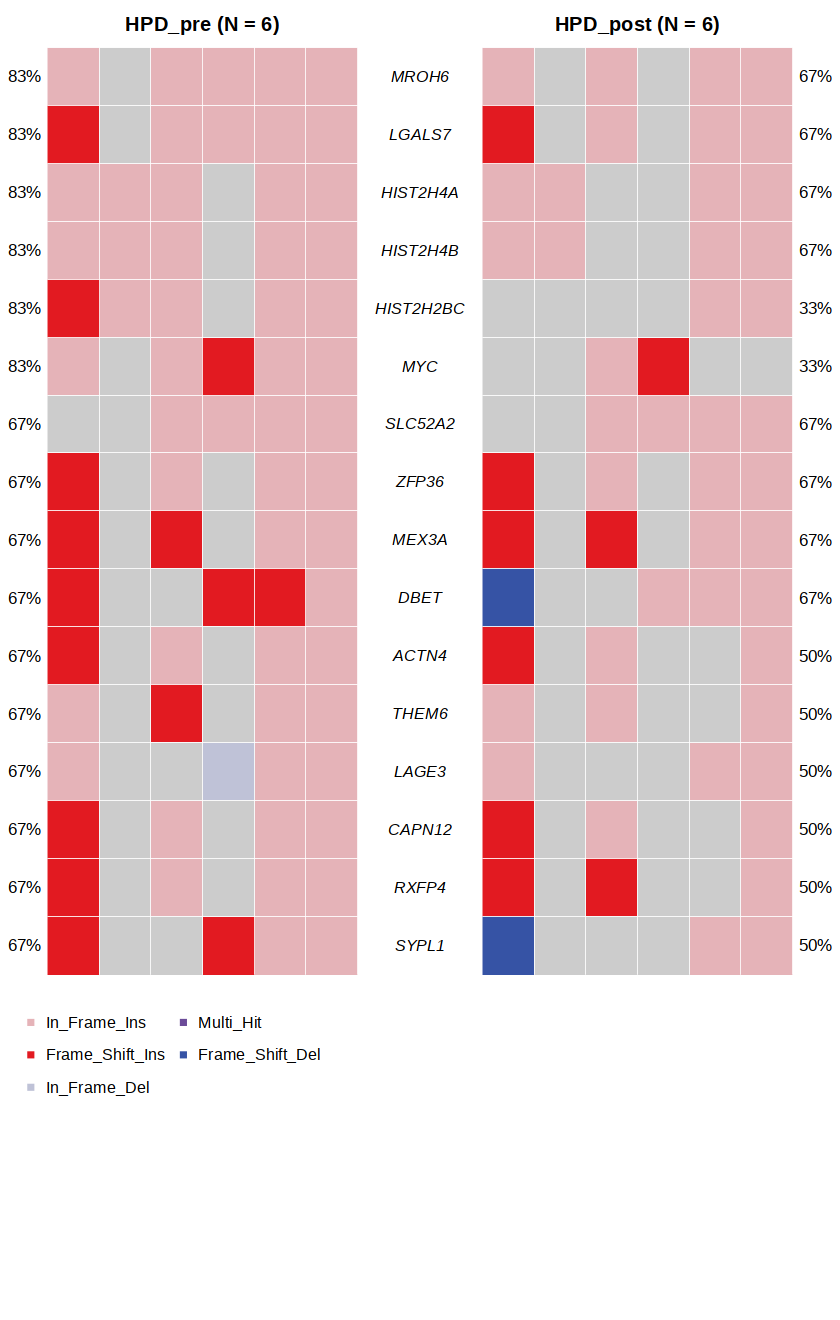

[1] "Global var .res, .data assigned!"


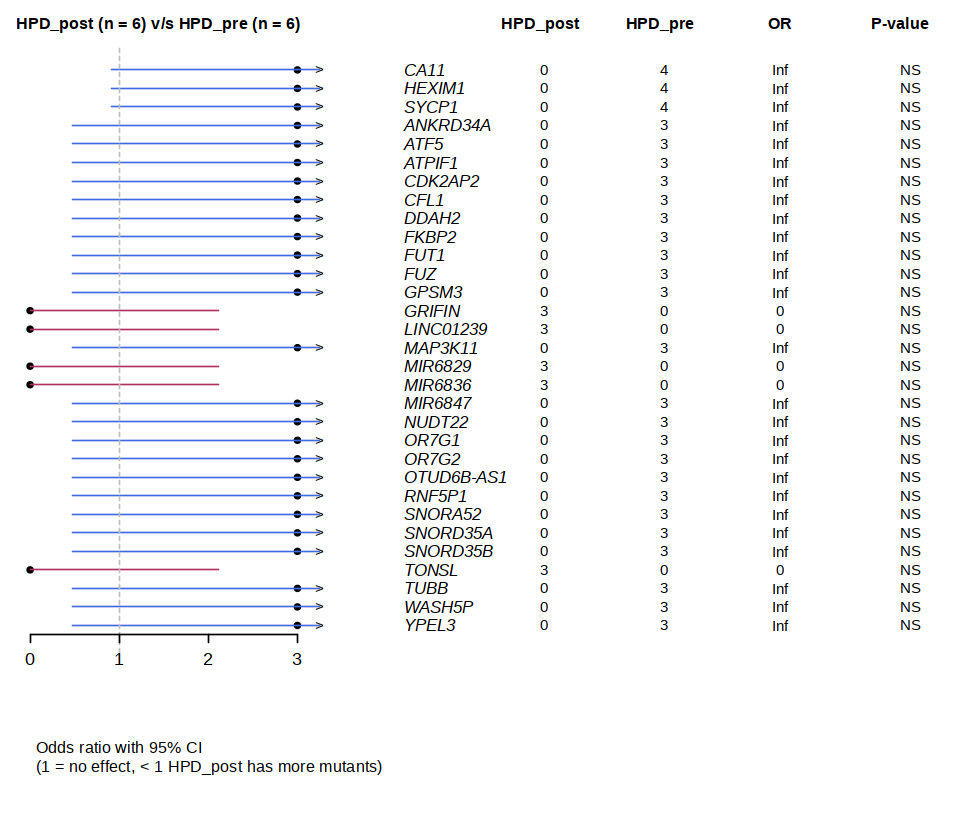

In [95]:
# %%R -w 650
TYPE = 'cnv' # c('fu','snv','cnv','cyto')
.res = list()
.data = list()

.data$mol = yload_dfx(.INPUT[[TYPE]]['mol'], frm=INPUTROOT) %>% dplyr::distinct(Hugo_Symbol,Tumor_Sample_Barcode,.keep_all = TRUE)
.data$glx = yload_dfx(.INPUT[[TYPE]]['g'], frm=INPUTROOT)
if (TYPE %in% c('snv','cnv')){
    .data$sel_genes = get(.INPUT[[TYPE]]['genes'],envir = .GlobalEnv)
    .data$sel_color = get(.INPUT[[TYPE]]['color'],envir = .GlobalEnv)
}
ygen_subMafs_(.data$mol,.data$glx,removeDuplicatedVariants = FALSE)
# plot coOncoplot
.data$plt.coon = expr(
    coOncoplot(m1 = g1, m2 = g2,sampleOrder1 = or1, sampleOrder2 = or2
               ,gene_mar=1.5
               , m1Name = g1name, m2Name = g2name
               # ,lengend_txt_replace =
               ,genes = .data$sel_genes
               ,removeNonMutated = FALSE
               ,colors = .data$sel_color
              )
)

make.custom(7,11)
# plt.coon %>% ysave('wes','coOncoplot','SNV',outputdir = OUTPUTROOT)
gg.2c1 =.data$plt.coon
eval(.data$plt.coon)


# plot forestplot
.data$g1.vs.g2 = mafCompare(m1 = g1, m2 = g2
                            , m1Name = g1name
                            , m2Name = g2name
                            , minMut = 0)

data$fig2c.snv.cmp = .data$g1.vs.g2$results

.x = .data$g1.vs.g2$results
for(p in c(0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5)){
    n = .x[.x$pval< p,] %>% nrow
    if ( n > 3) break
}
print(paste0('[!] Estimate p value for showing is ',p))
.data$plt.fors = expr(
    forestPlot(.data$g1.vs.g2, pVal = p)
)

make.custom(8,7)
# plt.fors %>% ysave('wes','forestplot','SNV',outputdir = OUTPUTROOT)
eval(.data$plt.fors)
# .g1.vs.g2$results %>% ysave('wes','forestplot','SNV', outputdir = OUTPUTROOT)

.res[[TYPE]] = .data
print('Global var .res, .data assigned!')

In [87]:
?read.maf

In [88]:
g = read.maf(.data$mol,glx,removeDuplicatedVariants=F)
g

-Validating
-Summarizing
-Processing clinical data
-Finished in 0.768s elapsed (8.552s cpu) 


An object of class  MAF 
                ID summary    Mean Median
1:      NCBI_Build  GRCh37      NA     NA
2:          Center    <NA>      NA     NA
3:         Samples      12      NA     NA
4:          nGenes    6507      NA     NA
5: Frame_Shift_Del     346  28.833   27.5
6: Frame_Shift_Ins    1194  99.500   75.5
7:    In_Frame_Del    2155 179.583  125.5
8:    In_Frame_Ins    6788 565.667  582.5
9:           total   10483 873.583  925.5

## fig 2D TMB

In [285]:
make.tall()
library(ggpubr)
df.tmb = yload_dfx('tmb2', frm=INPUTROOT) %>% mutate(Clin_classification=g,pairedID=c(1:6,1:6))
df.tmb

SEL = 'mutant.Mb'
YPOS = 5.2
YLABEL = 'TMB: Mutations / Mb'
my_comparisons <- list(c("HPD_pre","HPD_post"))
df = df.tmb

[1] "[ 2023-01-31 07:41:48 ]  read [ tmb2.dfx ] as ' tmb2 ' from >  data_HPD_pre_post"


g,ap,tmb,mutant.Mb,Clin_classification,pairedID
<chr>,<chr>,<int>,<dbl>,<chr>,<int>
HPD_post,A04569P0104569B,140,4.000000,HPD_post,1
HPD_post,A05812P010581201,133,3.800000,HPD_post,2
HPD_post,A06935P010693501,153,4.371429,HPD_post,3
HPD_post,A11906P01KYA1190601,110,3.142857,HPD_post,4
HPD_post,A11907P01KYA1190702,102,2.914286,HPD_post,5
⋮,⋮,⋮,⋮,⋮,⋮
HPD_pre,A05812P0105812,123,3.514286,HPD_pre,2
HPD_pre,A06935P010693502,144,4.114286,HPD_pre,3
HPD_pre,A11906P01KYA1190602,111,3.171429,HPD_pre,4


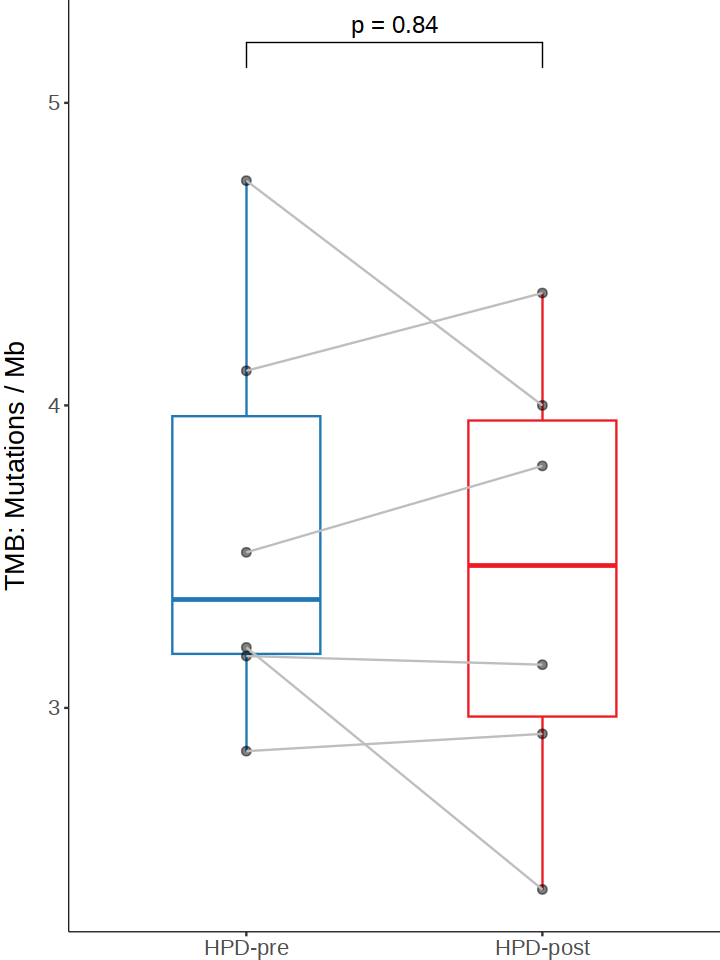

In [286]:
make.tall()

stat.df <- compare_means(
 as.formula(paste(SEL,'~ Clin_classification')), data = df,
 method = "wilcox.test",
    paired=TRUE,
#     group.by = "Clin_classification"
)  %>%
    mutate(y.position = YPOS)

# res.paired
level_order <- c('HPD_pre','HPD_post')

p = ggplot(df,aes(x=factor(Clin_classification,level=level_order)
                           ,y=!!sym(SEL)
                           ,color=Clin_classification)) 
p = p + geom_boxplot(width=0.5)

# outlier.colour="black", , outlier.size=2, notch=F
p = p + theme_classic() 

p = p + scale_x_discrete(limits=c('HPD_pre','HPD_post'),labels=c('HPD-pre','HPD-post'))
p = p + scale_color_manual(values=c("#ED1C24","#2078B4"))
# p = p + stat_summary(fun=mean, geom="point", shape=10, size=3)
# p = p + stat_compare_means(comparisons = my_comparisons, #给每组加p值
#                        method = "wilcox.test", #method可选：t.test(参数), wilcox.test(非参数)
#                        label = "p.signif", #label可选：p.signif(显示星星), p.format(显示数值)
#                        hide.ns = FALSE, size=5)
# p = p + stat_pvalue_manual(stat.df,label='p = {p.adj}',size=4)
p = p +  theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none")

p = p + geom_point(data=df,mapping = aes(x = factor(Clin_classification,level = level_order)
                          , y = !!sym(SEL), group=Clin_classification),color='black',size=2, alpha=0.5) +
    geom_line(data=df,aes(x = Clin_classification, y = !!sym(SEL),group=pairedID), color='grey') +
    theme_classic()

p = p + ylab(YLABEL) 
p = p + stat_pvalue_manual(stat.df,label='p = {p.adj}',size=5)

p = p +  theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none",
               axis.line = element_line(colour = 'black', size = 0.25),
               text = element_text(size=16),
               axis.title.y = element_text(vjust = 4),
               plot.margin = margin(t = 0, r = 0, b = 0, l = 12, unit = "pt")
              )
p

## fig 2E MATH

In [287]:
df.math = yload_dfx('MATH', frm=INPUTROOT) %>% mutate(g=Clin_classification,pairedID=c(1:6,1:6))
df.math

make.tall()
library(ggpubr)
SEL = 'MATH'
YPOS = 100
YLABEL = 'MATH Score'
df = df.math
my_comparisons <- list(c("HPD_pre","HPD_post"))

[1] "[ 2023-01-31 07:42:27 ]  read [ MATH.dfx ] as ' MATH ' from >  data_HPD_pre_post"


a,ap,p,Tumor_Sample_Barcode,Clin_classification,MedianAbsoluteDeviation,MATH,g,pairedID
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
A04569,A04569P0104569KY,P0104569KY,HPD1_pre,HPD_pre,9.280,82.23866,HPD_pre,1
A05812,A05812P0105812,P0105812,HPD2_pre,HPD_pre,22.360,90.68783,HPD_pre,2
A06935,A06935P010693502,P010693502,HPD3_pre,HPD_pre,6.755,75.67029,HPD_pre,3
A11906,A11906P01KYA1190602,P01KYA1190602,HPD4_pre,HPD_pre,3.120,41.26416,HPD_pre,4
A11907,A11907P01KYA1190701,P01KYA1190701,HPD5_pre,HPD_pre,18.480,83.83858,HPD_pre,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
A05812,A05812P010581201,P010581201,HPD2_post,HPD_post,16.130,66.61375,HPD_post,2
A06935,A06935P010693501,P010693501,HPD3_post,HPD_post,6.400,65.39380,HPD_post,3
A11906,A11906P01KYA1190601,P01KYA1190601,HPD4_post,HPD_post,7.745,69.42404,HPD_post,4


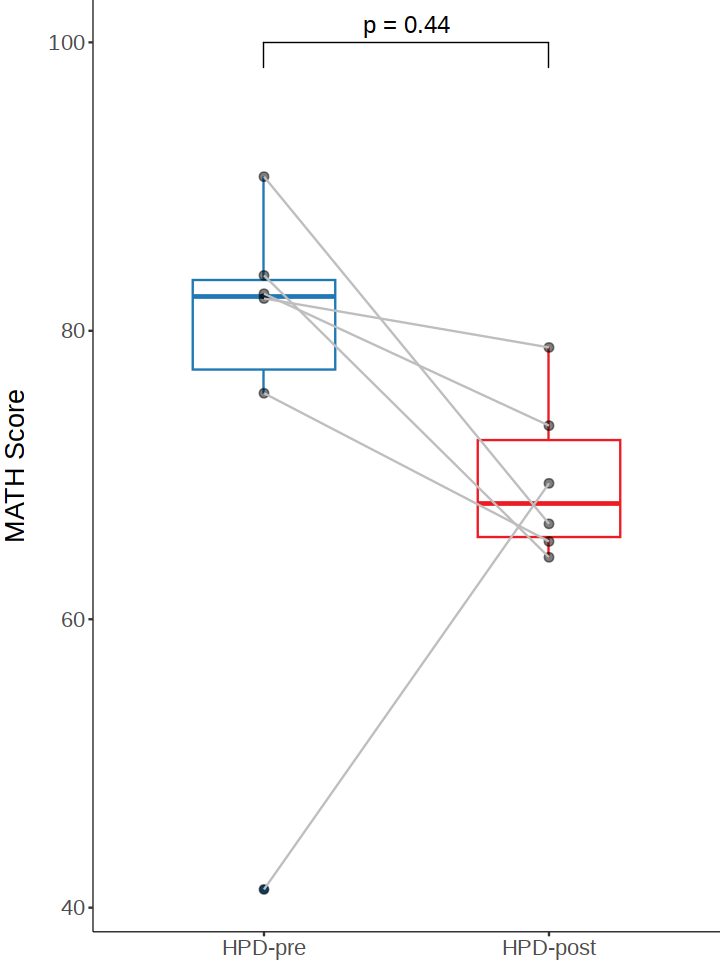

In [288]:
make.tall()

stat.df <- compare_means(
 as.formula(paste(SEL,'~ Clin_classification')), data = df,
 method = "wilcox.test",
    paired=TRUE,
#     group.by = "Clin_classification"
)  %>%
    mutate(y.position = YPOS)

# res.paired
level_order <- c('HPD_pre','HPD_post')

p = ggplot(df,aes(x=factor(Clin_classification,level=level_order)
                           ,y=!!sym(SEL)
                           ,color=Clin_classification)) 
p = p + geom_boxplot(width=0.5)

# outlier.colour="black", , outlier.size=2, notch=F
p = p + theme_classic() 

p = p + scale_x_discrete(limits=c('HPD_pre','HPD_post'),labels=c('HPD-pre','HPD-post'))
p = p + scale_color_manual(values=c("#ED1C24","#2078B4"))
# p = p + stat_summary(fun=mean, geom="point", shape=10, size=3)
# p = p + stat_compare_means(comparisons = my_comparisons, #给每组加p值
#                        method = "wilcox.test", #method可选：t.test(参数), wilcox.test(非参数)
#                        label = "p.signif", #label可选：p.signif(显示星星), p.format(显示数值)
#                        hide.ns = FALSE, size=5)
# p = p + stat_pvalue_manual(stat.df,label='p = {p.adj}',size=4)
p = p +  theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none")

p = p + geom_point(data=df,mapping = aes(x = factor(Clin_classification,level = level_order)
                          , y = !!sym(SEL), group=Clin_classification),color='black',size=2, alpha=0.5) +
    geom_line(data=df,aes(x = Clin_classification, y = !!sym(SEL),group=pairedID), color='grey') +
    theme_classic()

p = p + ylab(YLABEL) 
p = p + stat_pvalue_manual(stat.df,label='p = {p.adj}',size=5)

p = p +  theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none",
               axis.line = element_line(colour = 'black', size = 0.25),
               text = element_text(size=16),
               axis.title.y = element_text(vjust = 4),
               plot.margin = margin(t = 0, r = 0, b = 0, l = 12, unit = "pt")
              )
p

## Fig 3A paired

In [98]:
library(ggplot2)
library(ggpubr)
# library(ggthemes)

In [99]:
LEVELS = c('HPD_pre',"HPD_post")


In [267]:
group_table = yload_dfx('rna_glx',frm=INPUTROOT)
group_table

[1] "[ 2023-01-31 07:25:32 ]  read [ rna_glx.dfx ] as ' rna_glx ' from >  data_HPD_pre_post"


a,g,p,order,patient_id,ap,Tumor_Sample_Barcode,Clin_classification,note,db,Custom_Label
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A04569,HPD_pre,P23KYA0456901CC,0,A04569,A04569P23KYA0456901CC,HPD1_pre,HPD_pre,ori,rnaseq,HPD1_pre
A05812,HPD_pre,P23KYA05812CC,1,A05812,A05812P23KYA05812CC,HPD2_pre,HPD_pre,ori,rnaseq,HPD2_pre
A06935,HPD_pre,P23KYA06935CC,2,A06935,A06935P23KYA06935CC,HPD3_pre,HPD_pre,ori,rnaseq,HPD3_pre
A11906,HPD_pre,P23KYA11906LJ,3,A11906,A11906P23KYA11906LJ,HPD4_pre,HPD_pre,ori,rnaseq,HPD4_pre
A11907,HPD_pre,P23KYA11907LJ01,4,A11907,A11907P23KYA11907LJ01,HPD5_pre,HPD_pre,ori,rnaseq,HPD5_pre
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
A05812,HPD_post,P23KYA05812CC1,8,A05812,A05812P23KYA05812CC1,HPD2_post,HPD_post,ori,rnaseq,HPD2_post
A06935,HPD_post,P230693501,9,A06935,A06935P230693501,HPD3_post,HPD_post,ori,rnaseq,HPD3_post
A11906,HPD_post,P23KYA11906LJ1,10,A11906,A11906P23KYA11906LJ1,HPD4_post,HPD_post,ori,rnaseq,HPD4_post


In [175]:
colData = group_table %>% 
            column_to_rownames('Tumor_Sample_Barcode') %>% 
            dplyr::select(a,g=Clin_classification) %>% 
            mutate(a=factor(a),g=factor(g,levels=LEVELS)) %>%
            arrange(a,g) 
colData

,a,g
,<fct>,<fct>
HPD1_pre,A04569,HPD_pre
HPD1_post,A04569,HPD_post
HPD2_pre,A05812,HPD_pre
HPD2_post,A05812,HPD_post
HPD3_pre,A06935,HPD_pre
⋮,⋮,⋮
HPD4_post,A11906,HPD_post
HPD5_pre,A11907,HPD_pre
HPD5_post,A11907,HPD_post


In [178]:
colData %>% rownames_to_column('tsb') %>% ydumpto('rna_colData',outputdir = INPUTROOT)

[1] "[ 2023-01-31 02:44:13 ]  write 1 dfx at data_HPD_pre_post/rna_colData.dfx"


[1] "data_HPD_pre_post/rna_colData.dfx"

In [108]:
colData$g

[1] HPD_pre  HPD_post HPD_pre  HPD_post HPD_pre  HPD_post HPD_pre  HPD_post
 [9] HPD_pre  HPD_post HPD_pre  HPD_post
Levels: HPD_pre HPD_post

In [109]:
colData$a

[1] A04569 A04569 A05812 A05812 A06935 A06935 A11906 A11906 A11907 A11907
[11] A11908 A11908
Levels: A04569 A05812 A06935 A11906 A11907 A11908

In [119]:
# make sure the colnames(count_table) == rownames(colData)
count_table = yload_dfx('rna_count',row.names=1,frm=INPUTROOT)
count_table = count_table[,row.names(colData)]
count_table

[1] "[ 2023-01-31 02:04:46 ]  read [ rna_count.dfx ] as ' rna_count ' from >  data_HPD_pre_post"


,HPD1_pre,HPD1_post,HPD2_pre,HPD2_post,HPD3_pre,HPD3_post,HPD4_pre,HPD4_post,HPD5_pre,HPD5_post,HPD6_pre,HPD6_post
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,57,70,47,100,153,35,46,8,51,176,54,32
A1CF,81,10,52,59,38,13,510,48,26414,25269,7500,9681
A2M,17075,17674,18134,20978,4580,5154,26477,2053,74881,76507,66094,65194
A2ML1,4935,9333,896,1691,382,23,61,14,21,26,136,78
A3GALT2,131,84,144,255,2399,959,55,72,36,15,58,52
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZYG11A,1404,3219,498,782,3397,2428,1237,362,1489,946,330,211
ZYG11B,2601,3647,2263,4520,4436,4012,3092,743,3185,3114,2558,2488
ZYX,4987,4193,4606,3907,5647,3688,14163,14002,12966,16868,11823,10035


In [120]:
grps = colData$g %>% levels
grps

[1] "HPD_pre"  "HPD_post"

In [121]:
LEVELS[[1]]

[1] "HPD_pre"

In [122]:
dds_paired  = DESeqDataSetFromMatrix(count_table, colData = colData, design= ~ a + g) 

In [123]:
dds_paired$group <- relevel(dds_paired$g, ref = LEVELS[[1]])

In [124]:
dds_paired <- DESeq(dds_paired)


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [136]:
# nrDEG_paired
diff_expr <- as.data.frame(results(dds_paired)) %>%
                mutate(log2FC_abs = abs(log2FoldChange),.before = lfcSE) %>%
                arrange(pvalue,log2FoldChange) %>%
                filter(!is.na(pvalue)) %>% 
                rownames_to_column('symbol')
diff_expr

symbol,baseMean,log2FoldChange,log2FC_abs,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DSCAML1,1362.77963,1.347302,1.347302,0.2128198,6.330716,2.440258e-10,4.590125e-06
MYPN,72.12244,-2.290921,2.290921,0.4751480,-4.821490,1.424901e-06,1.252825e-02
AKR1B15,479.70828,-1.959344,1.959344,0.4164797,-4.704537,2.544431e-06,1.252825e-02
MYH1,1277.12704,-2.599103,2.599103,0.5535724,-4.695146,2.664169e-06,1.252825e-02
REG4,248.14485,-2.626461,2.626461,0.5661719,-4.638982,3.501294e-06,1.317187e-02
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CACNB2,921.3244,7.842322e-05,7.842322e-05,0.2875498,2.727291e-04,0.9997824,0.9999652
COASY,5602.1352,-4.379848e-05,4.379848e-05,0.1842310,-2.377367e-04,0.9998103,0.9999652
ADD3,5662.3699,2.724200e-05,2.724200e-05,0.1814874,1.501041e-04,0.9998802,0.9999652


In [228]:
diff_expr %>% ydumpto('rna_diffexpr',outputdir = OUTPUTROOT)

[1] "[ 2023-01-31 03:04:41 ]  write 1 dfx at report_HPD_pre_post/rna_diffexpr.dfx"


[1] "report_HPD_pre_post/rna_diffexpr.dfx"

In [139]:
x = list()
# x$dds_dif_exp_matrix=ddsDifExpMatrix
x$compare_ref_group = LEVELS[[1]]
x$compare_order = rev(LEVELS)
x$tag_to_add = x$compare_order %>% str_flatten(collapse = '_vs_')
cmp = x$tag_to_add
cmp

[1] "HPD_post_vs_HPD_pre"

In [258]:
ymake_names = function(names, unique = FALSE){
    names %>% make.names(unique = unique, allow_ = TRUE) %>% str_replace(fixed('.'),fixed('_'))
}

In [148]:
threshold = c(-1.2,1.2)
padj = 0.2

de = diff_expr %>% filter(!is.na(log2FC_abs) & !is.na(pvalue)) %>% 
    mutate(minus.log10pajd = -log10(padj),diffexpressed ="NO", delabel = "")

de$diffexpressed[de$log2FoldChange > threshold[2] & de$padj < padj] <- "UP"
de$diffexpressed[de$log2FoldChange < threshold[1] & de$padj < padj] <- "DOWN"
de$diffexpressed = factor(de$diffexpressed,levels=c('UP','NO','DOWN'))

de$delabel[de$diffexpressed != "NO"] = de$symbol[de$diffexpressed != "NO"]


xlimits_right = de$log2FC_abs %>% max 
xlimits_right = xlimits_right %>% round(2)

de

symbol,baseMean,log2FoldChange,log2FC_abs,lfcSE,stat,pvalue,padj,minus.log10pajd,diffexpressed,delabel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
DSCAML1,1362.77963,1.347302,1.347302,0.2128198,6.330716,2.440258e-10,4.590125e-06,5.338175,UP,DSCAML1
MYPN,72.12244,-2.290921,2.290921,0.4751480,-4.821490,1.424901e-06,1.252825e-02,1.902109,DOWN,MYPN
AKR1B15,479.70828,-1.959344,1.959344,0.4164797,-4.704537,2.544431e-06,1.252825e-02,1.902109,DOWN,AKR1B15
MYH1,1277.12704,-2.599103,2.599103,0.5535724,-4.695146,2.664169e-06,1.252825e-02,1.902109,DOWN,MYH1
REG4,248.14485,-2.626461,2.626461,0.5661719,-4.638982,3.501294e-06,1.317187e-02,1.880353,DOWN,REG4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CACNB2,921.3244,7.842322e-05,7.842322e-05,0.2875498,2.727291e-04,0.9997824,0.9999652,1.510724e-05,NO,
COASY,5602.1352,-4.379848e-05,4.379848e-05,0.1842310,-2.377367e-04,0.9998103,0.9999652,1.510724e-05,NO,
ADD3,5662.3699,2.724200e-05,2.724200e-05,0.1814874,1.501041e-04,0.9998802,0.9999652,1.510724e-05,NO,


In [149]:
gg.vol = ggplot(data=de, aes(x=log2FoldChange, y = minus.log10pajd,color =diffexpressed,label=delabel)) + 
    geom_point(alpha=0.5,size=4) + 
    theme_minimal() +
    scale_color_manual(values=c("red", "gray", "blue")) +
    geom_vline(xintercept=threshold, col="black",linetype='longdash') +
    geom_hline(yintercept=-log10(padj), col="black",linetype='longdash') +
    xlim(-xlimits_right,xlimits_right) + 
    ylab('-log10(pvalue)') +
#     ggtitle(label = cmp) + 
    ggrepel::geom_text_repel(box.padding = 0, point.padding = 0, nudge_y = 0.5, max.overlaps = 5)


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


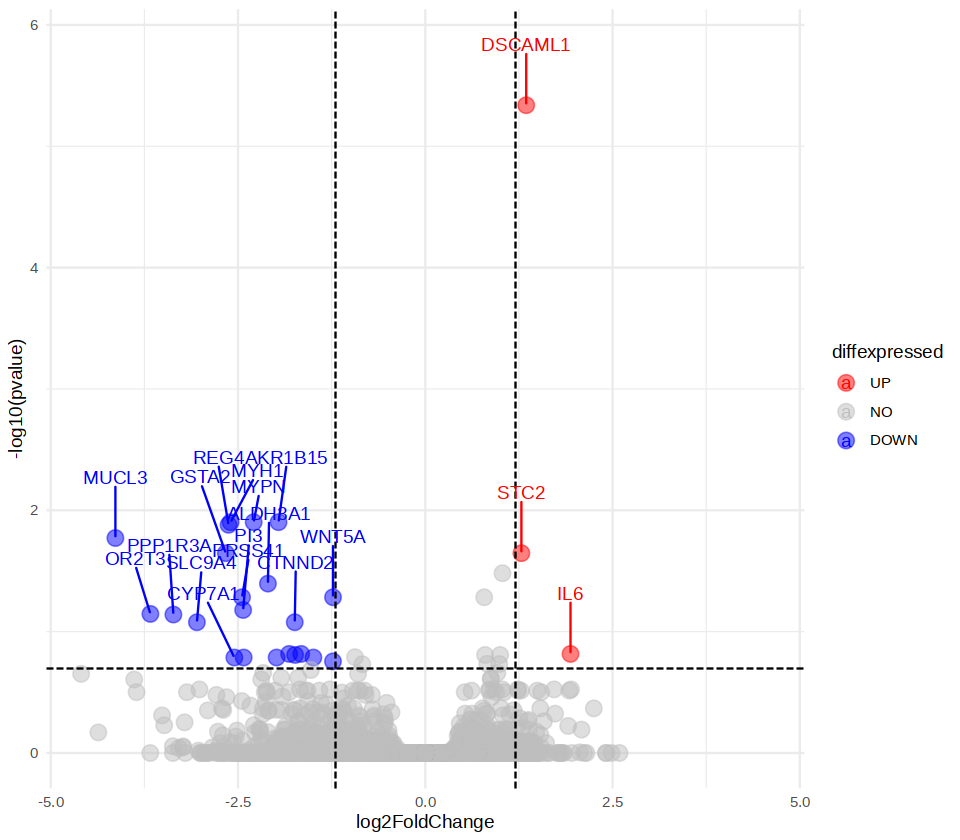

In [150]:
make.custom(8,7)
# gg.vol %>% ysave('fig3A',outputdir=OUTPUTROOT)
gg.vol

## Gen normalized count data

In [153]:
library(DESeq2)
source('/GCI/jup/A_TSF/dev/lib/yutils.R')

OUTPUT_TAG = 'rna'
MATRIX = 'rna_count.dfx'
GROUPTABLE = 'rna_glx.dfx'

de_res = ynormalize_count_bydeseq2(count_file_ = MATRIX
                                ,group_file = GROUPTABLE
                                ,frm=INPUTROOT
                                ,outputdir=INPUTROOT
                                ,norm = T
                                ,diff=F
                               )

de_res$normd_count %>%
    data.frame %>%
    rownames_to_column('symbol') %>%
    ydumpto('rna_normd.dfx',outputdir=INPUTROOT)


[1] "-------- Please library(\"DESeq2\") first ! -------"
[1] "[ 2023-01-31 02:30:16 ]  read [ rna_count.dfx ] as ' rna_count ' from >  data_HPD_pre_post"
[1] "[ 2023-01-31 02:30:16 ]  read [ rna_glx.dfx ] as ' rna_glx ' from >  data_HPD_pre_post"
[1] "Done analysis."
[1] "[ 2023-01-31 02:30:19 ]  write 1 dfx at data_HPD_pre_post/rna_normd.dfx"


[1] "data_HPD_pre_post/rna_normd.dfx"

[1] "[ 2023-01-31 02:30:19 ]  write 1 dfx at data_HPD_pre_post/rna_colData.dfx"


[1] "data_HPD_pre_post/rna_colData.dfx"

## fig 3B IL6

In [182]:
rna_norm = yload_dfx('rna_normd',frm=INPUTROOT)
colData = yload_dfx('rna_colData',frm=INPUTROOT)
rna_norm

[1] "[ 2023-01-31 02:44:50 ]  read [ rna_normd.dfx ] as ' rna_normd ' from >  data_HPD_pre_post"
[1] "[ 2023-01-31 02:44:50 ]  read [ rna_colData.dfx ] as ' rna_colData ' from >  data_HPD_pre_post"


symbol,HPD1_pre,HPD2_pre,HPD3_pre,HPD4_pre,HPD5_pre,HPD6_pre,HPD1_post,HPD2_post,HPD3_post,HPD4_post,HPD5_post,HPD6_post
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6.228324,6.086039,7.200755,5.935008,6.346531,6.175415,6.463476,6.878803,5.827837,5.099135,7.808063,5.704249
A1CF,6.607220,6.188450,5.711750,8.836248,14.890942,12.759467,4.841554,6.291978,5.043034,6.750374,14.811908,13.171767
A2M,13.939686,14.102900,11.861863,14.457135,16.393482,15.894479,14.012112,14.274477,12.331975,11.828303,16.409304,15.919999
A2ML1,12.154464,9.801902,8.377453,6.216226,5.505333,7.218164,13.092815,10.661769,5.462182,5.522181,5.679060,6.603110
A3GALT2,7.169267,7.350694,10.937559,6.110655,5.991327,6.249142,6.665905,8.047910,9.935496,7.231558,5.234895,6.168942
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZYG11A,10.36031,8.985429,11.43408,10.06900,10.76142,8.358321,11.56477,9.574107,11.25374,9.369075,10.10376,7.810795
ZYG11B,11.23743,11.114559,11.81608,11.37087,11.84749,11.217423,11.74349,12.066496,11.97256,10.379019,11.80012,11.222649
ZYX,12.16950,12.131697,12.16220,13.55589,13.86558,13.414229,11.94342,11.857530,11.85185,14.589785,14.22944,13.223444


In [183]:
colData

tsb,a,g
<chr>,<chr>,<chr>
HPD1_pre,A04569,HPD_pre
HPD1_post,A04569,HPD_post
HPD2_pre,A05812,HPD_pre
HPD2_post,A05812,HPD_post
HPD3_pre,A06935,HPD_pre
⋮,⋮,⋮
HPD4_post,A11906,HPD_post
HPD5_pre,A11907,HPD_pre
HPD5_post,A11907,HPD_post


In [185]:
map1 = colData %>% pull(g,name = tsb)
map2 = colData %>% pull(a,name = tsb)
map1
map2

HPD1_pre  HPD1_post   HPD2_pre  HPD2_post   HPD3_pre  HPD3_post   HPD4_pre 
 "HPD_pre" "HPD_post"  "HPD_pre" "HPD_post"  "HPD_pre" "HPD_post"  "HPD_pre" 
 HPD4_post   HPD5_pre  HPD5_post   HPD6_pre  HPD6_post 
"HPD_post"  "HPD_pre" "HPD_post"  "HPD_pre" "HPD_post"

HPD1_pre HPD1_post  HPD2_pre HPD2_post  HPD3_pre HPD3_post  HPD4_pre HPD4_post 
 "A04569"  "A04569"  "A05812"  "A05812"  "A06935"  "A06935"  "A11906"  "A11906" 
 HPD5_pre HPD5_post  HPD6_pre HPD6_post 
 "A11907"  "A11907"  "A11908"  "A11908"

In [290]:
df.il6 = rna_norm %>% filter(symbol=='IL6') %>% 
    pivot_longer(!symbol,values_to = 'expr.Norm', names_to = 'tsb') %>% 
    mutate(Clin_classification = map1[tsb],pairedID=factor(map2[tsb]))
df.il6

make.tall()
library(ggpubr)
SEL = 'expr.Norm'
YPOS = 10.2
YLABEL = 'IL6, standardized Expr'
df = df.il6

symbol,tsb,expr.Norm,Clin_classification,pairedID
<chr>,<chr>,<dbl>,<chr>,<fct>
IL6,HPD1_pre,5.084917,HPD_pre,A04569
IL6,HPD2_pre,4.512782,HPD_pre,A05812
IL6,HPD3_pre,4.581631,HPD_pre,A06935
IL6,HPD4_pre,6.345385,HPD_pre,A11906
IL6,HPD5_pre,4.490414,HPD_pre,A11907
⋮,⋮,⋮,⋮,⋮
IL6,HPD2_post,4.724585,HPD_post,A05812
IL6,HPD3_post,5.627431,HPD_post,A06935
IL6,HPD4_post,9.703418,HPD_post,A11906


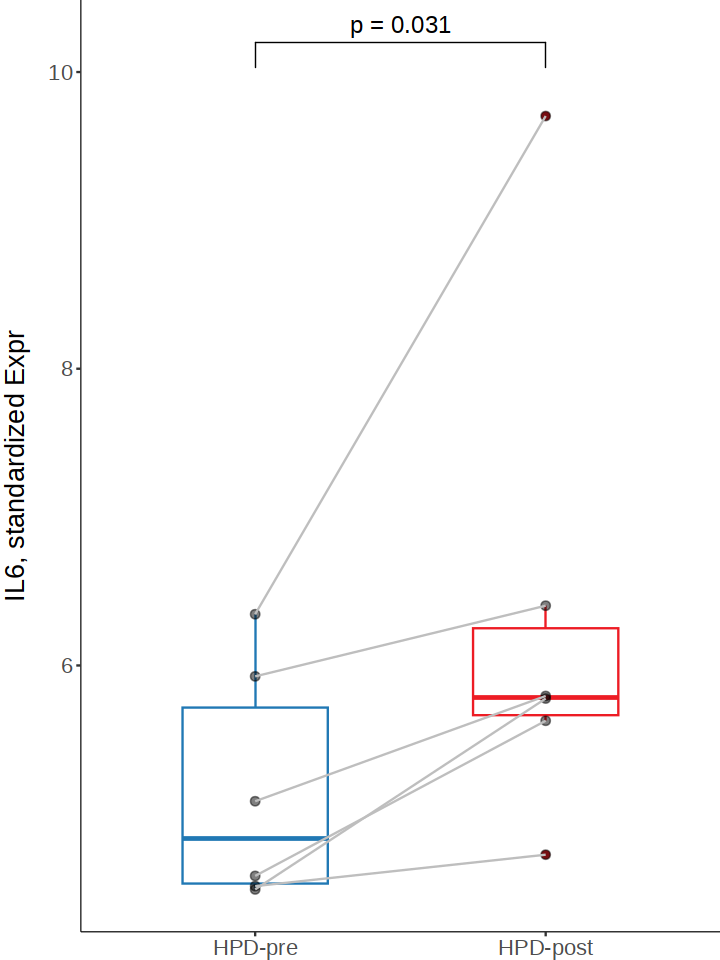

In [291]:
make.tall()

stat.df <- compare_means(
 as.formula(paste(SEL,'~ Clin_classification')), data = df,
 method = "wilcox.test",
    paired=TRUE,
#     group.by = "Clin_classification"
)  %>%
    mutate(y.position = YPOS)

# res.paired
level_order <- c('HPD_pre','HPD_post')

p = ggplot(df,aes(x=factor(Clin_classification,level=level_order)
                           ,y=!!sym(SEL)
                           ,color=Clin_classification)) 
p = p + geom_boxplot(width=0.5)

# outlier.colour="black", , outlier.size=2, notch=F
p = p + theme_classic() 

p = p + scale_x_discrete(limits=c('HPD_pre','HPD_post'),labels=c('HPD-pre','HPD-post'))
p = p + scale_color_manual(values=c("#ED1C24","#2078B4"))
# p = p + stat_summary(fun=mean, geom="point", shape=10, size=3)
# p = p + stat_compare_means(comparisons = my_comparisons, #给每组加p值
#                        method = "wilcox.test", #method可选：t.test(参数), wilcox.test(非参数)
#                        label = "p.signif", #label可选：p.signif(显示星星), p.format(显示数值)
#                        hide.ns = FALSE, size=5)
# p = p + stat_pvalue_manual(stat.df,label='p = {p.adj}',size=4)
p = p +  theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none")

p = p + geom_point(data=df,mapping = aes(x = factor(Clin_classification,level = level_order)
                          , y = !!sym(SEL), group=Clin_classification),color='black',size=2, alpha=0.5) +
    geom_line(data=df,aes(x = Clin_classification, y = !!sym(SEL),group=pairedID), color='grey') +
    theme_classic()

p = p + ylab(YLABEL) 
p = p + stat_pvalue_manual(stat.df,label='p = {p.adj}',size=5)

p = p +  theme(axis.title.x=element_blank(),
#                axis.title.y=element_text(),
               legend.position="none",
               axis.line = element_line(colour = 'black', size = 0.25),
               text = element_text(size=16),
               axis.title.y = element_text(vjust = 4),
               plot.margin = margin(t = 0, r = 0, b = 0, l = 12, unit = "pt")
              )
p

## fig S3AB TIME

In [234]:
custom_label = TRUE
SET_GRP_COLS = c('Clin_classification','a')

timer = yload_dfx('TIMER2_immune_matrix',frm=INPUTROOT)
if (file.exists(file.path(INPUTROOT,'rna_colData.dfx'))){
    colData = yload_dfx('rna_colData',frm=INPUTROOT,row.names=1)
}else{
    rna.glx = yload_dfx('rna_glx',frm=INPUTROOT)
    colData =  rna.glx %>% 
                select(c('Tumor_Sample_Barcode',SET_GRP_COLS)) %>% 
                column_to_rownames('Tumor_Sample_Barcode')
}

grps = timer$tool %>% unique
timer

[1] "[ 2023-01-31 03:13:08 ]  read [ TIMER2_immune_matrix.dfx ] as ' TIMER2_immune_matrix ' from >  data_HPD_pre_post"
[1] "[ 2023-01-31 03:13:08 ]  read [ rna_colData.dfx ] as ' rna_colData ' from >  data_HPD_pre_post"


tool,immune_cell,HPD1_pre,HPD1_post,HPD2_pre,HPD2_post,HPD3_post,HPD3_pre,HPD4_pre,HPD4_post,HPD5_pre,HPD5_post,HPD6_pre,HPD6_post
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TIMER,B cell,0.10920163,0.10671300,0.08128741,0.08114805,0.08224368,0.08459873,0.08212757,0.07517560,0.08033120,0.07872655,0.08327457,0.07811556
TIMER,T cell CD4+,0.11857085,0.11469435,0.11602029,0.11569791,0.12183997,0.12314172,0.12392425,0.13486316,0.12861239,0.13716485,0.13113477,0.13510456
TIMER,T cell CD8+,0.20291404,0.21271463,0.21189010,0.21325613,0.20686538,0.20494157,0.20773264,0.20311507,0.20307514,0.20066564,0.20458558,0.20547157
TIMER,Neutrophil,0.12871197,0.12963258,0.12646755,0.12756266,0.12616754,0.12603665,0.13062006,0.13791535,0.12715900,0.12761016,0.13324275,0.13254911
TIMER,Macrophage,0.04400994,0.04682102,0.03805171,0.03742464,0.03775235,0.03724180,0.03481278,0.05912932,0.04725751,0.04954639,0.04464972,0.04028289
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MCPCOUNTER,Macrophage/Monocyte,10.669606,18.349665,10.357075,7.2673556,2.7824389,3.5359490,10.42692,26.826396,34.222378,48.581829,32.120347,23.848299
MCPCOUNTER,Myeloid dendritic cell,3.744256,4.804405,1.017226,0.9945214,0.2265388,0.4717126,0.74193,6.619928,2.267693,2.361422,2.566974,2.178209
MCPCOUNTER,Neutrophil,9.307274,15.194709,23.331886,18.2310299,7.2042588,8.3767767,12.68425,13.998527,18.039258,17.734733,21.189838,15.395648


In [236]:
SELECTED_TOOLS = c('CIBERSORT','MCPCOUNTER')
timer_longer = yload_dfx('TIMER2_immune_matrix_longer.txt',frm=OUTPUTROOT,prefix='figx6') %>% 
    filter(tool %in% SELECTED_TOOLS) %>% 
    dplyr::select(!tsb)
a = gl(2,1,12,labels=c('pre','post'))
b = gl(6,2,12,labels = paste0("HPD",as.character(1:6)))
TSB_LEVELS = interaction(b,a,sep = '_',lex.order = TRUE)
timer_longer = timer_longer %>%
    mutate(Clin_classification = factor(Clin_classification,levels=c('HPD_pre','HPD_post')),
          Tumor_Sample_Barcode = factor(Tumor_Sample_Barcode,levels=c(!!TSB_LEVELS)),
           tsb = str_sub(Tumor_Sample_Barcode,start = 1,end = 4)
          )
timer_longer %>% head

[1] "[ 2023-01-31 03:15:23 ]  read [ TIMER2_immune_matrix_longer.txt ] as ' TIMER2_immune_matrix_longer ' from >  report_HPD_pre_post"


,tool,immune_cell,Tumor_Sample_Barcode,value,Clin_classification,a,tsb
,<chr>,<chr>,<fct>,<dbl>,<fct>,<chr>,<chr>
1,CIBERSORT,B cell naive,HPD1_pre,0.0321546696,HPD_pre,A04569,HPD1
2,CIBERSORT,B cell naive,HPD1_post,0.0000000000,HPD_post,A04569,HPD1
3,CIBERSORT,B cell naive,HPD2_pre,0.0000000000,HPD_pre,A05812,HPD2
4,CIBERSORT,B cell naive,HPD2_post,0.0003192601,HPD_post,A05812,HPD2
5,CIBERSORT,B cell naive,HPD3_post,0.1235388023,HPD_post,A06935,HPD3
6,CIBERSORT,B cell naive,HPD3_pre,0.2252716284,HPD_pre,A06935,HPD3


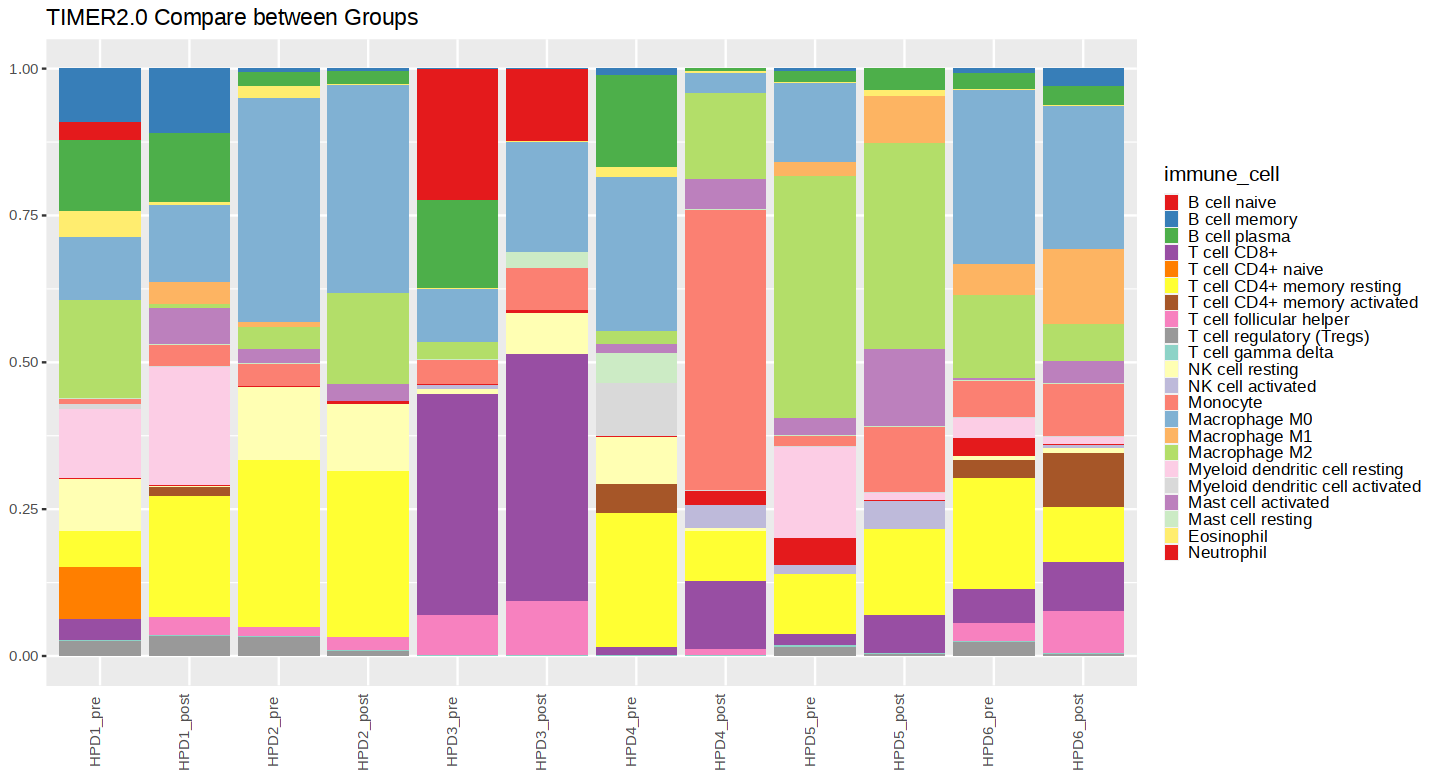

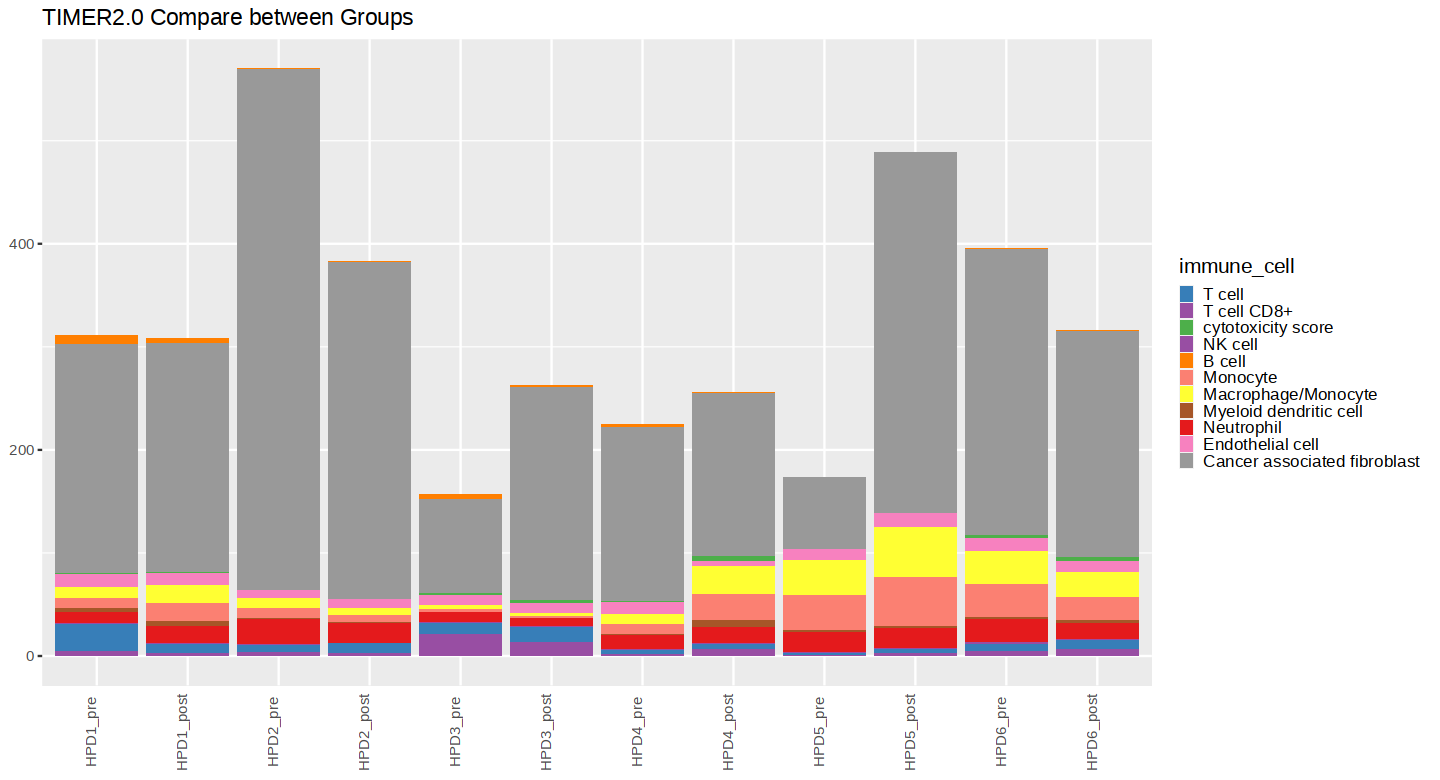

In [240]:
make.custom(12,6.5)
library(RColorBrewer)
IMMUNE_CELLS = timer_longer$immune_cell %>% unique
COLOURS = c(brewer.pal(9, name = 'Set1'),brewer.pal(12,name = 'Set3'),brewer.pal(9, name = 'Set1'))
names(COLOURS) = IMMUNE_CELLS
tools = timer_longer$tool %>% unique

for (tool in tools){
    data = timer_longer %>% filter(tool==!!tool)
    im_cells = data$immune_cell %>% unique
    ccolr = COLOURS %>% ygetlast(im_cells)
    gg3 = data %>%
         ggplot(aes(x=Tumor_Sample_Barcode,y=value,fill=immune_cell)) + 
            geom_bar(stat="identity",position='stack') +
            #facet_grid(tool~a, scales='free', labeller = labeller(.multi_line=F)) +
            theme(axis.text.x = element_text(angle = 90)) +
            theme(
    #           axis.line = element_blank(),
    #           axis.text = element_blank(),
                axis.ticks.x = element_blank(),
                axis.text.x=element_text(vjust = -0.05),
    #           panel.grid  = element_blank(),
                axis.title = element_blank(),
#               strip.text.x = element_text(size=6, face="italic", color="darkblue")
                strip.text.x = element_blank()
               )+
            theme(legend.key.size = unit(0.3, 'cm'), #change legend key size
                legend.key.height = unit(0.3, 'cm'), #change legend key height
                legend.key.width = unit(0.3, 'cm'), #change legend key width
                legend.title = element_text(size=12), #change legend title font size  
                legend.text = element_text(size=10)
                 ) +
            guides(fill=guide_legend(ncol=1)) +
            labs(title = 'TIMER2.0 Compare between Groups') +
            scale_fill_manual(values=ccolr,breaks = names(ccolr)) +
            scale_x_discrete()

#     gg3 %>% ydumpto('TIMER2_cmp_bt_groups.pdf',outputdir=OUTPUTROOT,width=7.5,height=6,prefix=PREFIX)
#     timer_longer %>% ydumpto('TIMER2_cmp_bt_groups.txt',outputdir=OUTPUTROOT,prefix=PREFIX)
    print(gg3)
}
